Leire Yining Santos Gil (leirey01@ucm.es) \
Jesus Sierralaya (jsierral@ucm.es)

## Importar librerias

In [1]:
# Supress info messages
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

from matplotlib import pyplot
from pandas import DataFrame

print(tf.__version__)

2.13.0


## Función que dibuja los datos del ejemplo

In [2]:
# definimos una funcion para dibujar los datos
def miplot(X, y):
    df = DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=y))
    colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'black'}
    fig, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
    pyplot.show()

## Ejercicio 1


### Generación de los datos circulares

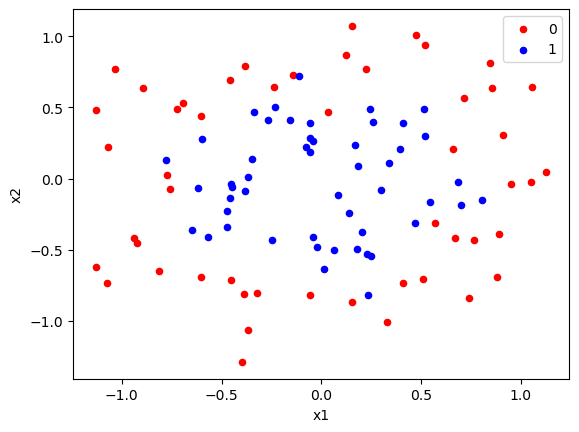

In [3]:
X,y = make_circles(noise=0.2, factor=0.5, random_state=1)
miplot(X,y)

### Construcción de la red

In [4]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=2))

model.add(Dense(32, activation='relu'))    
                                                        
model.add(Dense(1, activation='sigmoid'))    

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  

### Aplicamos el modelo a nuestros datos

In [5]:
model.fit(X, y, epochs=100, verbose=False) 
test_loss, test_acc = model.evaluate(X, y) 

4/4 [==============================] - 0s 956us/step - loss: 0.2266 - accuracy: 0.9200


Los valores de coste en este ejemplo son 0.2266 y de clasificación correcta 0.92.

## Ejercicio 2

### Generación de los datos en espiral

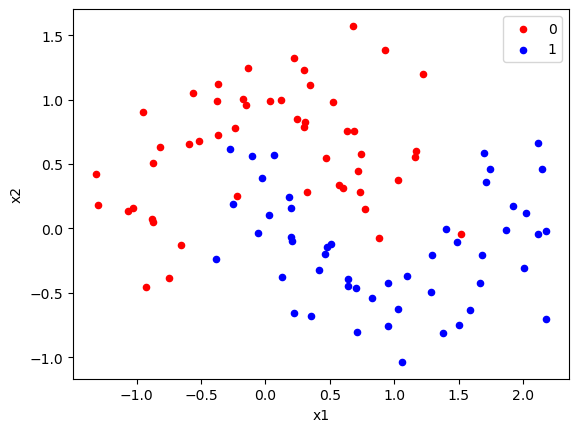

In [6]:
X,y = make_moons(noise=0.3, random_state=0)
miplot(X,y)

### Generamos los senos de las variables de entrada

In [7]:
X = np.concatenate((X,np.sin(X)), axis=1) 

### Construcción de la red

In [8]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=4)) 

model.add(Dense(6, activation='relu')) 

model.add(Dense(1, activation='relu')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

### Aplicamos el modelo a nuestros datos

In [9]:
model.fit(X, y, epochs=800, verbose=False)
test_loss, test_acc = model.evaluate(X, y) 

4/4 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.9500


Los valores de coste en este ejemplo son 0.1147 y de clasificación correcta 0.95.